In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
rand_state=1000

In [3]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli3Polygon.txt') 

In [4]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli3Polygon.csv', index=None)

In [5]:
df = pd.read_table('AOI_hitStimuli3Polygon.csv')

In [6]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon
0,Skilled,625,306,666,626,326,1
1,Skilled,621,304,666,626,326,1
2,Skilled,620,303,666,626,326,1
3,Skilled,621,304,666,626,326,1
4,Skilled,622,300,666,626,326,1


In [7]:
df.nunique()

Skill_level                   2
Gaze_point_X                754
Gaze_point_Y                845
Gaze_event_duration         106
Fixation_point_X            444
Fixation_point_Y            532
AOI_hit_Stimuli3_Polygon      2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Skill_level               24541 non-null  object
 1   Gaze_point_X              24541 non-null  int64 
 2   Gaze_point_Y              24541 non-null  int64 
 3   Gaze_event_duration       24541 non-null  int64 
 4   Fixation_point_X          24541 non-null  int64 
 5   Fixation_point_Y          24541 non-null  int64 
 6   AOI_hit_Stimuli3_Polygon  24541 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
df.isna().sum()

Skill_level                 0
Gaze_point_X                0
Gaze_point_Y                0
Gaze_event_duration         0
Fixation_point_X            0
Fixation_point_Y            0
AOI_hit_Stimuli3_Polygon    0
dtype: int64

In [10]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon
count,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000
mean,685.371786,348.716271,630.703802,685.202559,349.088709,0.518479
std,128.361134,186.632301,885.857751,127.906720,185.977232,0.499669
min,104.000000,-66.000000,66.000000,114.000000,-34.000000,0.000000
25%,621.000000,192.000000,233.000000,621.000000,191.000000,0.000000
50%,688.000000,299.000000,366.000000,686.000000,299.000000,1.000000
75%,776.000000,541.000000,616.000000,778.000000,544.000000,1.000000
max,1636.000000,970.000000,5907.000000,1629.000000,960.000000,1.000000


<Figure size 600x400 with 0 Axes>

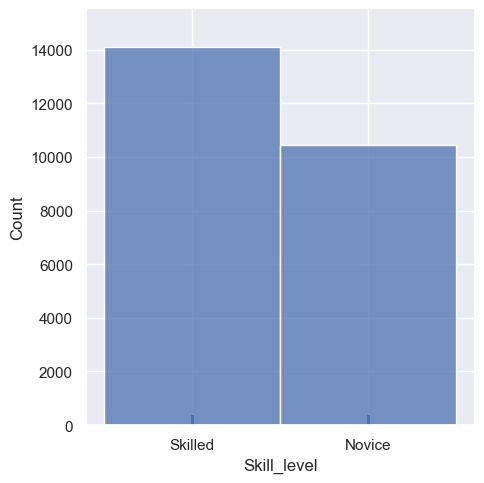

In [11]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [12]:
ordinal_categoricals = ['Skill_level']

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
enc = OrdinalEncoder()

In [15]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [16]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon
0,1.0,625,306,666,626,326,1
1,1.0,621,304,666,626,326,1
2,1.0,620,303,666,626,326,1
3,1.0,621,304,666,626,326,1
4,1.0,622,300,666,626,326,1


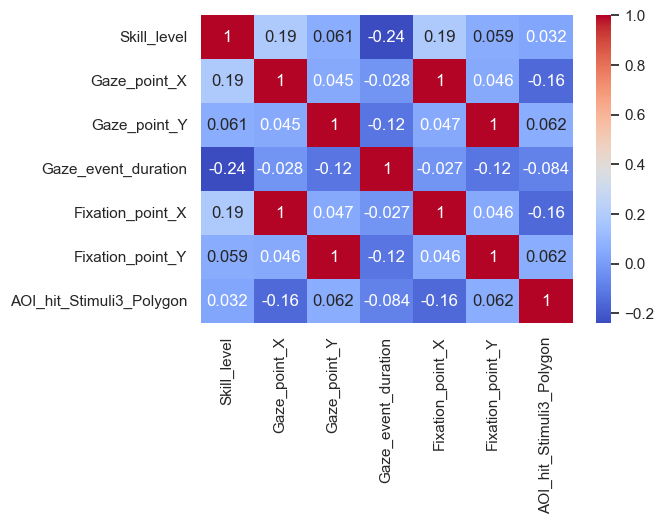

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 15.5 s
Wall time: 15.7 s


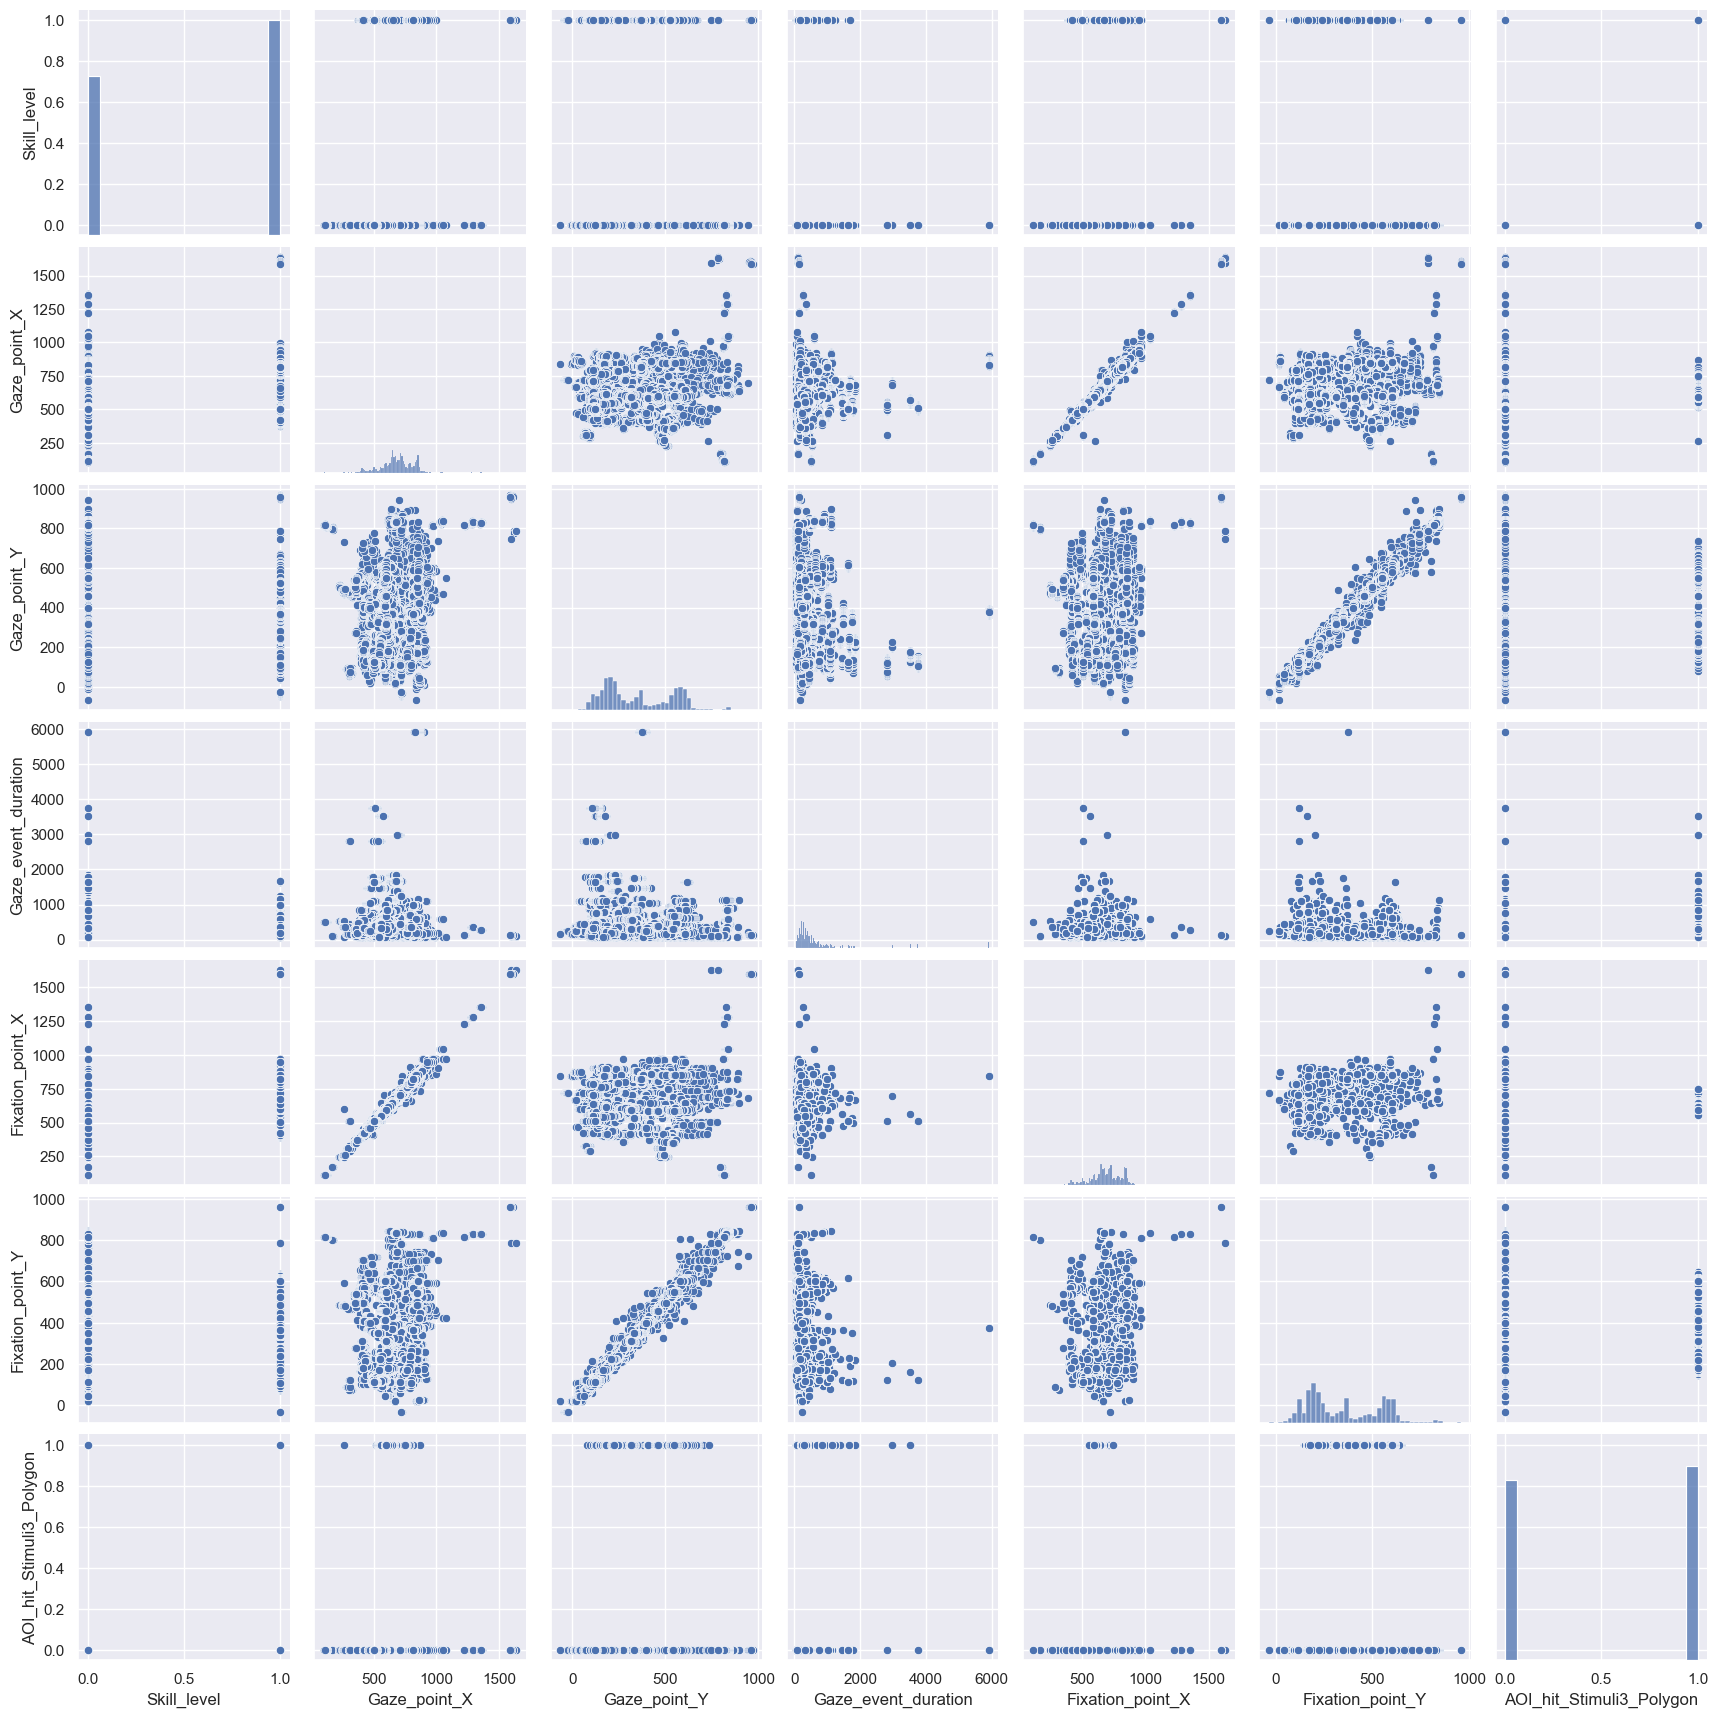

In [18]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli3_Polygon' ]])

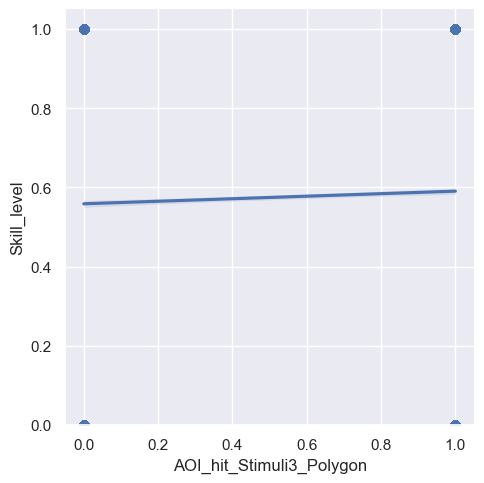

In [20]:
g= sns.lmplot(x='AOI_hit_Stimuli3_Polygon', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

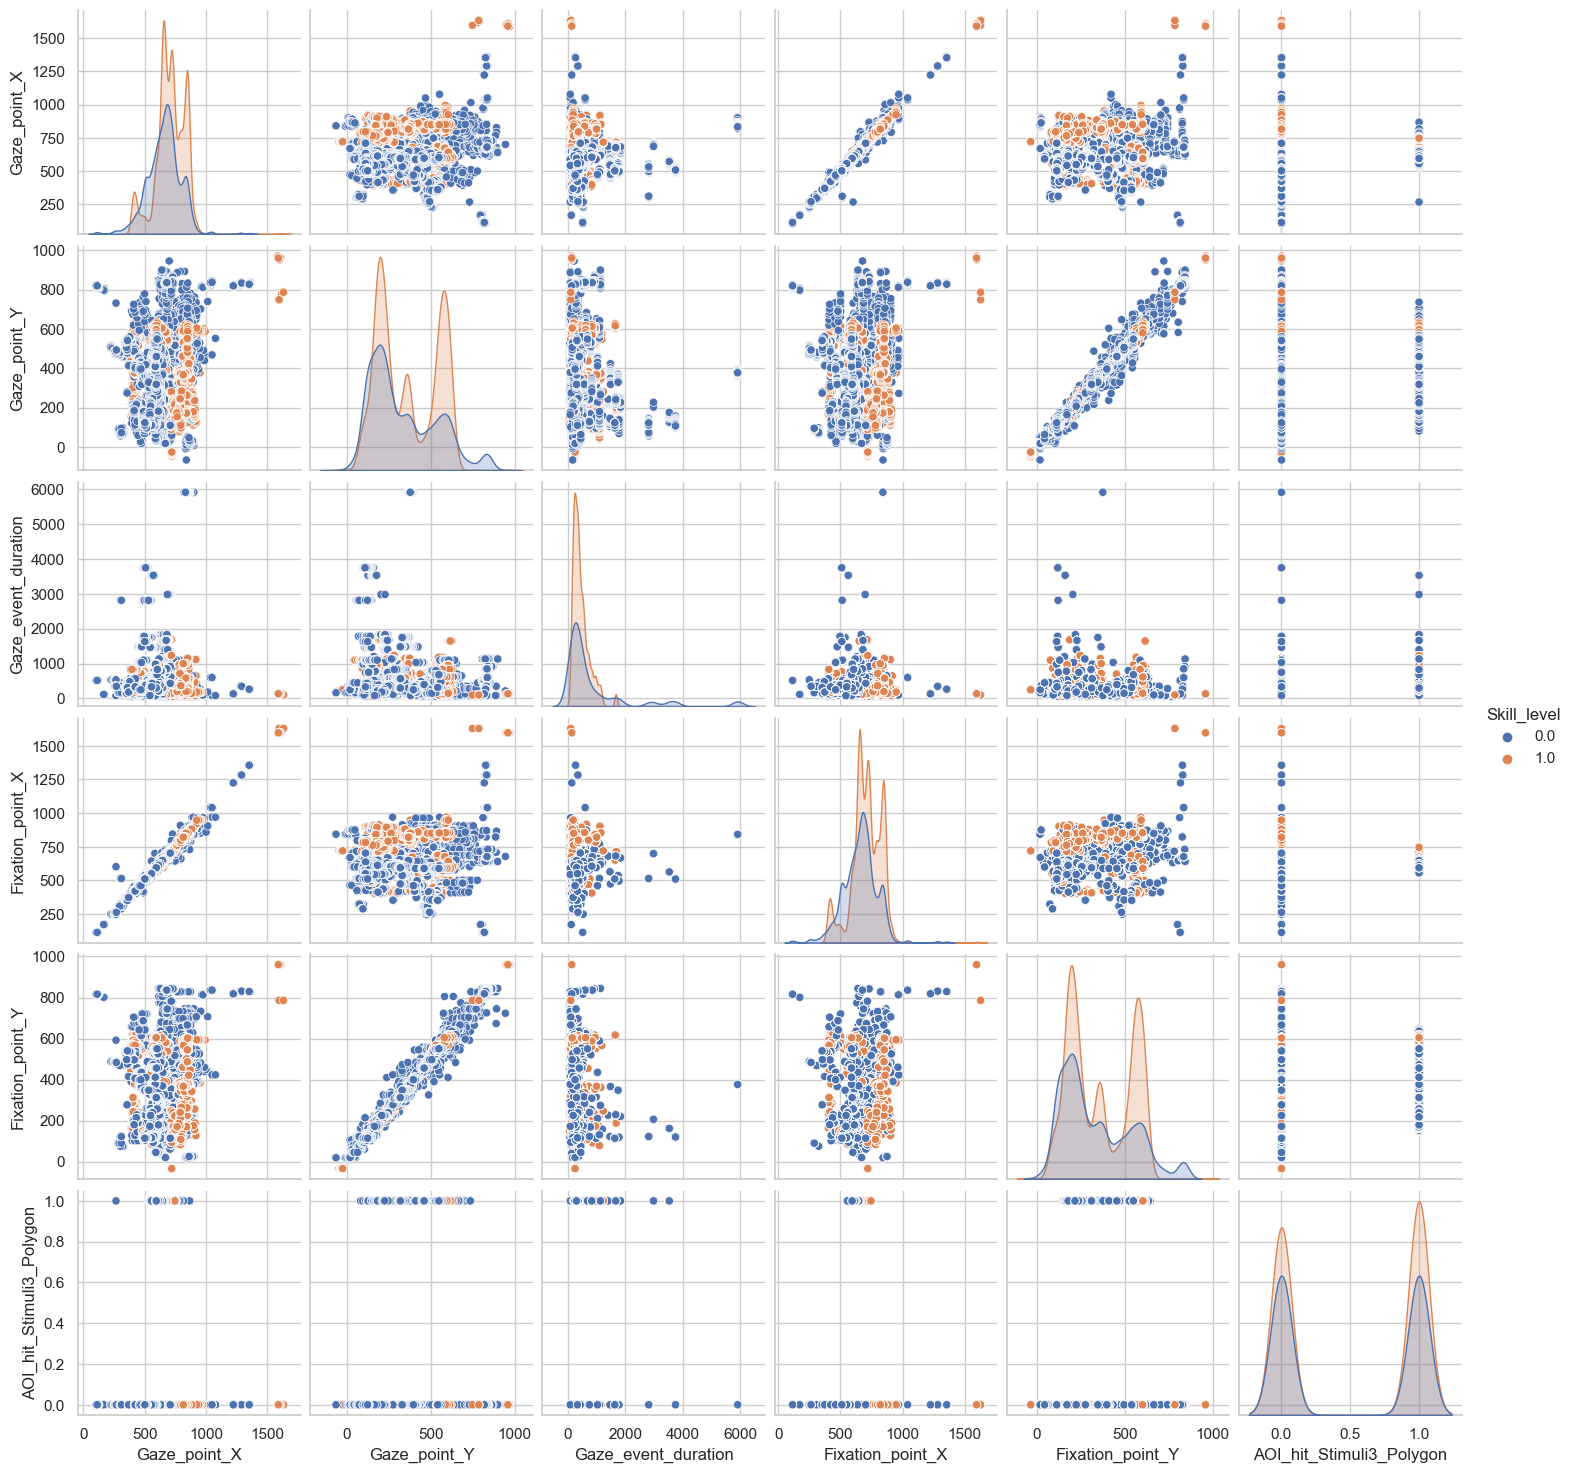

In [22]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [23]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [24]:
reg_model = LinearRegression()


In [25]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon
995,690,155,216,691,158,1
21120,799,371,366,799,368,0
16767,632,213,1830,667,220,1
13758,727,326,83,723,318,1
5803,582,570,383,579,559,1


In [26]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_hat = reg_model.predict(X_test)

In [28]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
21934,0.0,0.386816,-0.386816
3862,1.0,0.715178,0.284822
8938,0.0,0.709315,-0.709315
21021,1.0,0.690915,0.309085
8083,1.0,0.643847,0.356153


In [29]:
reg_model.coef_

array([-0.00114351,  0.00092934, -0.00012826,  0.00186865, -0.00086516,
        0.04207756])

In [30]:
reg_model.intercept_

0.11554453891773275

In [31]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0011
1,Gaze_point_Y,0.0009
2,Gaze_event_duration,-0.0001
3,Fixation_point_X,0.0019
4,Fixation_point_Y,-0.0009
5,AOI_hit_Stimuli3_Polygon,0.0421


In [32]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.095
Test data R-squared: 0.095


In [33]:
X_train.shape

(19632, 6)

In [34]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [35]:
adj_R2(X_train, y_train)

0.094

In [36]:
df_predictions.head()

,actuals,predictions,resid
21934,0.0,0.386816,-0.386816
3862,1.0,0.715178,0.284822
8938,0.0,0.709315,-0.709315
21021,1.0,0.690915,0.309085
8083,1.0,0.643847,0.356153


In [37]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.221

In [38]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.221

In [40]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.47

In [41]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [42]:
my_estimator = LinearRegression()

In [43]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [44]:
R2

array([0.09025606, 0.10332984, 0.09710933, 0.08147327, 0.0977118 ])

In [45]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [46]:
MSE = -NMSE
MSE

array([0.22178507, 0.21932802, 0.22089766, 0.22489265, 0.2199827 ])

In [47]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.221

In [48]:
RMSE = np.sqrt(MSE)
RMSE

array([0.47094062, 0.46832469, 0.46999751, 0.47422848, 0.46902313])